# MFCC extraction
### Dowload data set: https://code.google.com/archive/p/hmm-speech-recognition/downloads

In [23]:
from os import listdir
from os.path import isdir, join
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [24]:
# Dataset path
dataset_path = 'data/' 

# Create and view all possible targets
targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(targets)
print('alltargets: ',len(targets))

['apple', 'banana', 'kiwi', 'lime', 'orange', 'peach', 'pineapple']
alltargets:  7


In [25]:
# See how many samples are in each
num_samples = 0
for target in targets:
    print(target,', ',len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

apple ,  15
banana ,  15
kiwi ,  15
lime ,  15
orange ,  15
peach ,  15
pineapple ,  15
Total samples: 105


In [26]:
# Settings
target_list = targets
feature_sets_file = 'mfcc_sets_BD1.npz'
win_len = 0.02
win_step = 0.01
num_mfcc = 20
len_mfcc = 33 # 10 ms samples

In [27]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)
    print(target,' => label: ', index)

data/apple
apple  => label:  0
data/banana
banana  => label:  1
data/kiwi
kiwi  => label:  2
data/lime
lime  => label:  3
data/orange
orange  => label:  4
data/peach
peach  => label:  5
data/pineapple
pineapple  => label:  6


In [28]:
# Check Y vector
for item in y:
    print(len(item))

15
15
15
15
15
15
15


In [29]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]
print(len(y), len(filenames))

105 105


In [30]:
# check
print(filenames)
print(y)

['apple01.wav', 'apple02.wav', 'apple03.wav', 'apple04.wav', 'apple05.wav', 'apple06.wav', 'apple07.wav', 'apple08.wav', 'apple09.wav', 'apple10.wav', 'apple11.wav', 'apple12.wav', 'apple13.wav', 'apple14.wav', 'apple15.wav', 'banana01.wav', 'banana02.wav', 'banana03.wav', 'banana04.wav', 'banana05.wav', 'banana06.wav', 'banana07.wav', 'banana08.wav', 'banana09.wav', 'banana10.wav', 'banana11.wav', 'banana12.wav', 'banana13.wav', 'banana14.wav', 'banana15.wav', 'kiwi01.wav', 'kiwi02.wav', 'kiwi03.wav', 'kiwi04.wav', 'kiwi05.wav', 'kiwi06.wav', 'kiwi07.wav', 'kiwi08.wav', 'kiwi09.wav', 'kiwi10.wav', 'kiwi11.wav', 'kiwi12.wav', 'kiwi13.wav', 'kiwi14.wav', 'kiwi15.wav', 'lime01.wav', 'lime02.wav', 'lime03.wav', 'lime04.wav', 'lime05.wav', 'lime06.wav', 'lime07.wav', 'lime08.wav', 'lime09.wav', 'lime10.wav', 'lime11.wav', 'lime12.wav', 'lime13.wav', 'lime14.wav', 'lime15.wav', 'orange01.wav', 'orange02.wav', 'orange03.wav', 'orange04.wav', 'orange05.wav', 'orange06.wav', 'orange07.wav', 'o

In [31]:
# Function: Create MFCC from given path
from scipy.io import wavfile

def calc_mfcc(path):
    
    # Load wavefile
    fs, signal = wavfile.read(path)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=win_len,
                                            winstep=win_step,
                                            numcep=num_mfcc,
                                            winfunc=np.hanning)

    return mfccs.transpose()

In [32]:
# Function: Create MFCCs
def extract_features(in_files, in_y):
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)
        mfccs = mfccs[:,:len_mfcc]
        out_x.append(mfccs)
        out_y.append(in_y[index])
        print('Shape:', index, mfccs.shape)
            
    return out_x, out_y

In [33]:
# extract features into sets
x, y= extract_features(filenames, y)


Shape: 0 (20, 33)
Shape: 1 (20, 33)
Shape: 2 (20, 33)
Shape: 3 (20, 33)
Shape: 4 (20, 33)
Shape: 5 (20, 33)
Shape: 6 (20, 33)
Shape: 7 (20, 33)
Shape: 8 (20, 33)
Shape: 9 (20, 33)
Shape: 10 (20, 33)
Shape: 11 (20, 33)
Shape: 12 (20, 33)
Shape: 13 (20, 33)
Shape: 14 (20, 33)
Shape: 15 (20, 33)
Shape: 16 (20, 33)
Shape: 17 (20, 33)
Shape: 18 (20, 33)
Shape: 19 (20, 33)
Shape: 20 (20, 33)
Shape: 21 (20, 33)
Shape: 22 (20, 33)
Shape: 23 (20, 33)
Shape: 24 (20, 33)
Shape: 25 (20, 33)
Shape: 26 (20, 33)
Shape: 27 (20, 33)
Shape: 28 (20, 33)
Shape: 29 (20, 33)
Shape: 30 (20, 33)
Shape: 31 (20, 33)
Shape: 32 (20, 33)
Shape: 33 (20, 33)
Shape: 34 (20, 33)
Shape: 35 (20, 33)
Shape: 36 (20, 33)
Shape: 37 (20, 33)
Shape: 38 (20, 33)
Shape: 39 (20, 33)
Shape: 40 (20, 33)
Shape: 41 (20, 33)
Shape: 42 (20, 33)
Shape: 43 (20, 33)
Shape: 44 (20, 33)
Shape: 45 (20, 33)
Shape: 46 (20, 33)
Shape: 47 (20, 33)
Shape: 48 (20, 33)
Shape: 49 (20, 33)
Shape: 50 (20, 33)
Shape: 51 (20, 33)
Shape: 52 (20, 33)
Sha

In [34]:
# check x and y vectors
print(len(x), len(y))
print(x[0])
print(x[0].shape)

105 105
[[ 1.60494287e+01  1.77168291e+01  2.00614752e+01  1.97826391e+01
   2.03560669e+01  2.06371745e+01  2.06693718e+01  1.94776966e+01
   1.84512526e+01  1.67214531e+01  1.64342042e+01  1.66593494e+01
   1.62180445e+01  1.65785808e+01  1.66402766e+01  1.70665923e+01
   1.60056936e+01  1.63919597e+01  1.67165143e+01  1.70208405e+01
   1.75473895e+01  1.82050735e+01  1.84371376e+01  1.83555525e+01
   1.84718565e+01  1.84967265e+01  1.71733622e+01  1.76547357e+01
   1.54190334e+01  1.50190933e+01  1.65701323e+01  1.50300061e+01
   1.50654579e+01]
 [-2.65705047e+01 -2.39843626e+01 -3.33263386e+01 -2.54831422e+01
  -2.93861177e+01 -2.62321510e+01 -2.85621226e+01 -2.09480813e+01
  -3.31631400e+00 -7.66752776e+00 -1.05683775e+01 -1.32008745e+01
  -1.51417593e+01 -1.05072378e+01 -1.15254211e+01 -1.79790198e+01
  -1.46827035e+01 -1.71113187e+01 -1.91171804e+01 -1.86284370e+01
   1.77394074e+00  6.68506070e+00  9.91809202e+00  1.01466890e+01
   6.30219978e+00  2.21969368e+00  2.06799475e+00

MFCCs: [[ 1.28023810e+01  1.25386765e+01  1.24253193e+01  1.25837527e+01
   1.68230318e+01  1.55093735e+01  1.63518744e+01  1.61990788e+01
   1.72137653e+01  1.66930612e+01  1.58729179e+01  1.59105792e+01
   1.57223878e+01  1.60559889e+01  1.60725931e+01  1.63853104e+01
   1.63883456e+01  1.66736134e+01  1.72844609e+01  1.69802926e+01
   1.71186304e+01  1.72944858e+01  1.66799186e+01  1.56794093e+01
   1.49900555e+01  1.45634821e+01  1.47145406e+01  1.42282941e+01
   1.48495096e+01  1.60293026e+01  1.66414021e+01  1.62693140e+01
   1.61905988e+01  1.62123804e+01  1.61108950e+01  1.45342846e+01
   1.50470396e+01  1.36236338e+01  1.38190171e+01  1.30192171e+01
   1.45597231e+01]
 [-5.67725918e+00 -5.34372695e+00 -9.75385170e+00 -1.28357352e+01
  -2.70153981e+01 -2.33662537e+01 -2.83383410e+01 -2.59309776e+01
  -3.36914037e+01 -2.67255478e+01 -1.37378931e+01 -4.09277202e-01
  -6.92780180e-02  6.11914913e-01 -1.22941989e+00 -1.90397607e+00
  -2.44023563e+00 -3.85681527e+00 -4.93460953e+00 

ValueError: Colormap grey is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

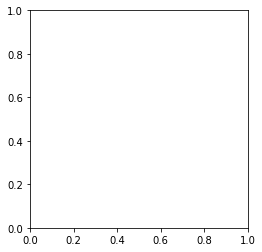

In [50]:
# TEST: Test shorter MFCC
# !pip install playsound
from playsound import playsound

idx = 30

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y[idx])], 
            filenames[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y[idx])])
playsound(path)

In [40]:
# Save features
np.savez(feature_sets_file, x=x, y=y, words = targets)

In [41]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x', 'y', 'words']

In [44]:
print(feature_sets['x'].shape)
print(feature_sets['y'].shape)

(105, 20, 33)
(105,)


In [46]:
print(feature_sets['y'])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6.]


In [49]:
print(feature_sets['x'][0].shape)

(20, 33)


In [ ]:
# Split MFFCC coefficients into random train and test subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Train files : ",len(x_train))
print("Test files : ", len(x_test))